In [3]:
!pip install tensorflow

  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl (300.8 MB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_auth_oauthlib-1.2.0-py2.py3-non

In [4]:
import os
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
from tensorflow import keras

C:\Users\ACER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
x_train=[];y_train=[]
import os
x = os.path.join("D:/Dataset/feremotion/test")
train=os.listdir(x)
for i in train:
    for j in os.listdir(os.path.join(x,i)):
        img1=Image.open(os.path.join(x,i,j))
        img1=img1.convert("RGB")
        x_train.append(np.array(img1))
        if i=="angry":
            y_train.append(0)
        if i=="disgust":
            y_train.append(1)
        if i=="fear":
            y_train.append(2)
        if i=="happy":
            y_train.append(3)
        if i=="neutral":
            y_train.append(4)
        if i=="sad":
            y_train.append(5)
        if i=="surprise":
            y_train.append(6)

In [7]:
print(x_train)
x_train=np.array(x_train)
y_train=np.array(y_train)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [8]:
print(x_train.shape,y_train.shape,sep='\n')

(7178, 48, 48, 3)
(7178,)


In [9]:
x_test=[];y_test=[]
x = os.path.join("D:/Dataset/feremotion/test")

test=os.listdir(x)
for i in test:
    for j in os.listdir(os.path.join(x,i)):
        img1=Image.open(os.path.join(x,i,j))
        img1=img1.convert("RGB")
        x_test.append(np.array(img1))
        if i=="angry":
            y_test.append(0)
        if i=="disgust":
            y_test.append(1)
        if i=="fear":
            y_test.append(2)
        if i=="happy":
            y_test.append(3)
        if i=="neutral":
            y_test.append(4)
        if i=="sad":
            y_test.append(5)
        if i=="surprise":
            y_test.append(6)

In [10]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [11]:
print(x_test.shape,y_test.shape,sep='\n')

(7178, 48, 48, 3)
(7178,)


In [12]:
shuffle_indexes = np.arange(x_train.shape[0])
np.random.shuffle(shuffle_indexes)
x_train = x_train[shuffle_indexes]
y_train = y_train[shuffle_indexes]

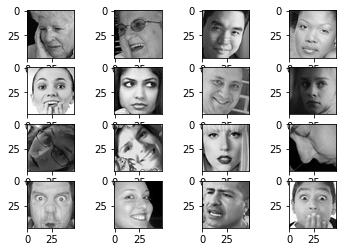

In [13]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])

In [14]:
import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential

In [15]:
model=Sequential()

model.add(Conv2D(16,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(7,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                     

In [17]:
opt=keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics='accuracy')

In [18]:
es=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode="max",verbose=1,patience=20)
mcp=keras.callbacks.ModelCheckpoint('model.h5',moniter='val_accuracy',verbose=1,mode='max',save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es,mcp])

Epoch 1/100


90/90 [==============================] - ETA: 0s - loss: 3.6130 - accuracy: 0.2078
Epoch 1: val_loss improved from -inf to 1.90088, saving model to model.h5
90/90 [==============================] - 14s 124ms/step - loss: 3.6130 - accuracy: 0.2078 - val_loss: 1.9009 - val_accuracy: 0.2632
Epoch 2/100


C:\Users\ACER\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - ETA: 0s - loss: 3.1112 - accuracy: 0.2092
Epoch 2: val_loss improved from 1.90088 to 3.59462, saving model to model.h5
90/90 [==============================] - 11s 120ms/step - loss: 3.1112 - accuracy: 0.2092 - val_loss: 3.5946 - val_accuracy: 0.1504
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 2.0077 - accuracy: 0.2217
Epoch 3: val_loss improved from 3.59462 to 4.81638, saving model to model.h5
90/90 [==============================] - 13s 142ms/step - loss: 2.0077 - accuracy: 0.2217 - val_loss: 4.8164 - val_accuracy: 0.1337
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 1.8272 - accuracy: 0.2604
Epoch 4: val_loss did not improve from 4.81638
90/90 [==============================] - 13s 150ms/step - loss: 1.8272 - accuracy: 0.2604 - val_loss: 2.1824 - val_accuracy: 0.2535
Epoch 5/100
90/90 [==============================] - ETA: 0s - loss: 1.7744 - accuracy: 0.2941
Epoch 5: val_loss did not improve f

In [19]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

225/225 [==============================] - 4s 18ms/step - loss: 1.0007 - accuracy: 0.6556
1.0006890296936035
0.6556143760681152


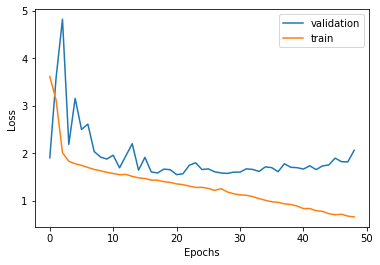

In [20]:
plt.plot(hist.history['val_loss'],label='validation')
plt.plot(hist.history['loss'],label='train')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

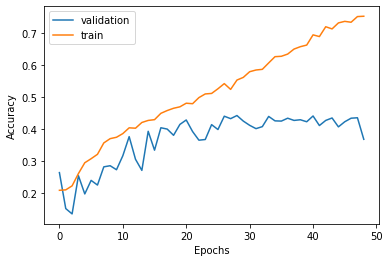

In [21]:
plt.plot(hist.history['val_accuracy'],label='validation')
plt.plot(hist.history['accuracy'],label='train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [22]:
from keras.applications.vgg16 import VGG16,preprocess_input

In [23]:
x1_train=[preprocess_input(img1) for img1 in x_train]

In [24]:
x1_train=np.array(x1_train)

In [25]:
x1_train.shape

(7178, 48, 48, 3)

In [26]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model.summary()

58889256/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [27]:
feature_train=base_model.predict(x1_train,batch_size=64)

113/113 [==============================] - 45s 393ms/step


In [28]:
feature_train.shape

(7178, 1, 1, 512)

In [29]:
feature_test=base_model.predict(x_test,batch_size=64)

113/113 [==============================] - 36s 316ms/step


In [30]:
feature_train=feature_train.reshape(feature_train.shape[0], -1)

In [31]:
feature_train.shape

(7178, 512)

In [32]:
feature_test=feature_test.reshape(feature_test.shape[0], -1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm

In [34]:
train_10000=feature_train[:10000]
y_train_10000=y_train[:10000]

In [35]:
train_10000.shape

(7178, 512)

In [36]:
clf = svm.SVC()

clf.fit(train_10000 ,y_train_10000)

# Make predictions on the test set
predictions = clf.predict(feature_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 43.59%


In [37]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

RF_model.fit(feature_train, y_train)

predictions = RF_model.predict(feature_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 46.53%


ValueError: too many values to unpack (expected 4)

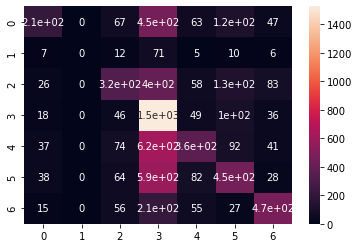

In [38]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

tp, fp, fn, tn = cm.ravel()

recall = tp/(tp+fn)
precision = tp/(tp+fp)

print('Accuracy =', metrics.accuracy_score(y_test, prediction_RF))
print("Recall =", recall)
print("Precision =", precision)

In [39]:
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [40]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [41]:
for layer in base_model.layers:
    layer.trainable=False

In [42]:
x=base_model.layers[-1].output
x=Flatten()(x)
x=Dense(7,activation='softmax')(x)

model=Model(base_model.input,x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [43]:
opt=keras.optimizers.Adam()
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
es1=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=20,restore_best_weights=True)
hist=model.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es1])

Epoch 1/100
90/90 [==============================] - 70s 775ms/step - loss: 12.9614 - accuracy: 0.2139 - val_loss: 8.3759 - val_accuracy: 0.2716
Epoch 2/100
90/90 [==============================] - 78s 872ms/step - loss: 7.1147 - accuracy: 0.2799 - val_loss: 5.9230 - val_accuracy: 0.2841
Epoch 3/100
90/90 [==============================] - 80s 894ms/step - loss: 4.9144 - accuracy: 0.3055 - val_loss: 4.5986 - val_accuracy: 0.2981
Epoch 4/100
90/90 [==============================] - 76s 846ms/step - loss: 3.6230 - accuracy: 0.3366 - val_loss: 3.6947 - val_accuracy: 0.3210
Epoch 5/100
90/90 [==============================] - 41s 451ms/step - loss: 2.8804 - accuracy: 0.3612 - val_loss: 3.2192 - val_accuracy: 0.3162
Epoch 6/100
90/90 [==============================] - 35s 391ms/step - loss: 2.4010 - accuracy: 0.3816 - val_loss: 3.0042 - val_accuracy: 0.3085
Epoch 7/100
90/90 [==============================] - 33s 372ms/step - loss: 2.1425 - accuracy: 0.3924 - val_loss: 2.6626 - val_accuracy

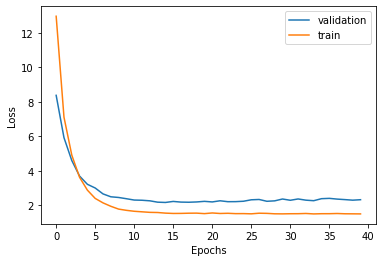

In [45]:
plt.plot(hist.history['val_loss'],label="validation")
plt.plot(hist.history['loss'],label='train')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

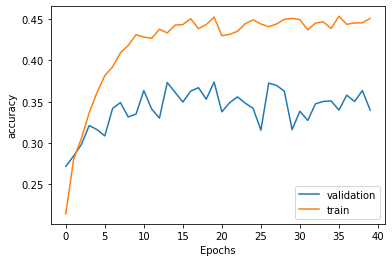

In [46]:
plt.plot(hist.history['val_accuracy'],label="validation")
plt.plot(hist.history['accuracy'],label='train')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()

In [47]:
base_model1=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [48]:
for i in range(15):
    base_model1.layers[i].trainable=False

In [49]:
y=base_model1.layers[-1].output
y=Flatten()(y)
y=Dense(7,activation='softmax')(y)
    
model1=Model(inputs=base_model1.input,outputs=y)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [50]:
opt=keras.optimizers.Adam(learning_rate=0.05)
model1.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
es2=keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=20,restore_best_weights=True)
hist1=model1.fit(x_train,y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[es2])

Epoch 1/100
90/90 [==============================] - 39s 417ms/step - loss: 953353.5625 - accuracy: 0.1768 - val_loss: 777.4057 - val_accuracy: 0.1720
Epoch 2/100
90/90 [==============================] - 37s 415ms/step - loss: 406.3519 - accuracy: 0.2233 - val_loss: 2.0058 - val_accuracy: 0.1497
Epoch 3/100
90/90 [==============================] - 37s 416ms/step - loss: 4.3417 - accuracy: 0.2184 - val_loss: 1.8013 - val_accuracy: 0.2653
Epoch 4/100
90/90 [==============================] - 37s 414ms/step - loss: 1.8316 - accuracy: 0.2285 - val_loss: 1.8002 - val_accuracy: 0.2653
Epoch 5/100
90/90 [==============================] - 37s 414ms/step - loss: 1.8279 - accuracy: 0.2332 - val_loss: 1.8104 - val_accuracy: 0.2653
Epoch 6/100
90/90 [==============================] - 37s 416ms/step - loss: 1.8342 - accuracy: 0.2276 - val_loss: 1.8248 - val_accuracy: 0.2653
Epoch 7/100
90/90 [==============================] - 39s 433ms/step - loss: 1.8387 - accuracy: 0.2219 - val_loss: 1.8021 - val_

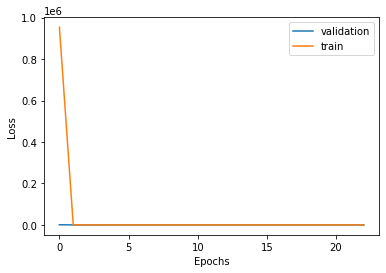

In [52]:
plt.plot(hist1.history['val_loss'],label="validation")
plt.plot(hist1.history['loss'],label='train')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

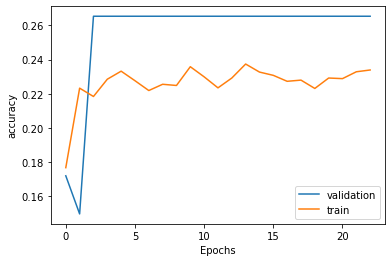

In [53]:
plt.plot(hist1.history['val_accuracy'],label="validation")
plt.plot(hist1.history['accuracy'],label='train')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()

In [54]:
base_model2=VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))
base_model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     